In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from copy import copy
import seaborn as sns

In [ ]:
df=pd.read_csv('OnlineNewsPopularity.csv')



In [ ]:
df.shape

(39644, 61)

In [ ]:
df.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1    timedelta                      39644 non-null  float64
 2    n_tokens_title                 39644 non-null  float64
 3    n_tokens_content               39644 non-null  float64
 4    n_unique_tokens                39644 non-null  float64
 5    n_non_stop_words               39644 non-null  float64
 6    n_non_stop_unique_tokens       39644 non-null  float64
 7    num_hrefs                      39644 non-null  float64
 8    num_self_hrefs                 39644 non-null  float64
 9    num_imgs                       39644 non-null  float64
 10   num_videos                     39644 non-null  float64
 11   average_token_length           39644 non-null  float64
 12   num_keywords                   

In [ ]:
df.drop(labels=['url', ' timedelta'], axis = 1, inplace=True)


In [ ]:
df.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [ ]:
df=df[df[' n_tokens_content']!=0]

In [ ]:
df.shape

(38463, 59)

In [ ]:
df=df[df[' n_non_stop_words']!=1042]

In [ ]:
df.describe()


,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,38462.000000,38462.000000,38462.000000,3.846200e+04,38462.000000,38462.000000,38462.000000,38462.000000,38462.000000,38462.000000,...,38462.000000,38462.000000,38462.000000,38462.000000,38462.000000,38462.000000,38462.000000,38462.000000,38462.000000,38462.000000
mean,10.382455,563.269201,0.546837,1.000000e+00,0.693455,11.217877,3.394597,4.561853,1.263819,4.687892,...,0.098379,0.779983,-0.267500,-0.537984,-0.110804,0.280581,0.070999,0.342440,0.154934,3355.294238
std,2.113816,468.277491,0.102314,4.022927e-09,0.100644,11.340728,3.869676,8.292093,4.164945,0.283234,...,0.070381,0.212474,0.121168,0.279693,0.094918,0.323562,0.264341,0.188600,0.225637,11586.112129
min,2.000000,18.000000,0.114964,9.999999e-01,0.119134,0.000000,0.000000,0.000000,0.000000,3.600000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,9.000000,259.000000,0.477419,1.000000e+00,0.632588,5.000000,1.000000,1.000000,0.000000,4.496245,...,0.050000,0.600000,-0.331540,-0.714286,-0.125000,0.000000,0.000000,0.166667,0.000000,945.000000
50%,10.000000,423.000000,0.542982,1.000000e+00,0.693727,8.000000,3.000000,1.000000,0.000000,4.674120,...,0.100000,0.800000,-0.257738,-0.500000,-0.100000,0.125000,0.000000,0.500000,0.000000,1400.000000
75%,12.000000,729.000000,0.611111,1.000000e+00,0.756944,14.000000,4.000000,4.000000,1.000000,4.861903,...,0.100000,1.000000,-0.193423,-0.312500,-0.050000,0.500000,0.136364,0.500000,0.250000,2700.000000
max,23.000000,8474.000000,1.000000,1.000000e+00,1.000000,304.000000,116.000000,128.000000,91.000000,8.041534,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [ ]:
df.drop(labels=[' n_non_stop_words'], axis = 1, inplace=True)

In [ ]:
df.shape

(38462, 58)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38462 entries, 0 to 39643
Data columns (total 58 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0    n_tokens_title                 38462 non-null  float64
 1    n_tokens_content               38462 non-null  float64
 2    n_unique_tokens                38462 non-null  float64
 3    n_non_stop_unique_tokens       38462 non-null  float64
 4    num_hrefs                      38462 non-null  float64
 5    num_self_hrefs                 38462 non-null  float64
 6    num_imgs                       38462 non-null  float64
 7    num_videos                     38462 non-null  float64
 8    average_token_length           38462 non-null  float64
 9    num_keywords                   38462 non-null  float64
 10   data_channel_is_lifestyle      38462 non-null  float64
 11   data_channel_is_entertainment  38462 non-null  float64
 12   data_channel_is_bus            

In [ ]:
original_data=copy(df)

In [ ]:
share_data = np.sort(df[' shares'].values)
print(share_data.shape)
length = share_data.shape[0]
print(length)
middle = share_data[int(length*0.7)-1]
middle

(38462,)
38462


2300

In [ ]:
share_label = list()
for share in df[' shares']:
    if share <= 1700:
        share_label.append('0')
    else:
        share_label.append('1')

In [ ]:
df.shape

(38462, 58)

In [ ]:
df = pd.concat([df.reset_index(drop=True), pd.DataFrame(share_label, columns=['status'])], axis=1)
df.head(4)

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,status
0,12.0,219.0,0.663594,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,...,0.7,-0.350000,-0.600,-0.200000,0.5,-0.1875,0.0,0.1875,593,0
1,9.0,255.0,0.604743,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,...,0.7,-0.118750,-0.125,-0.100000,0.0,0.0000,0.5,0.0000,711,0
2,9.0,211.0,0.575130,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,...,1.0,-0.466667,-0.800,-0.133333,0.0,0.0000,0.5,0.0000,1500,0
3,9.0,531.0,0.503788,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,...,0.8,-0.369697,-0.600,-0.166667,0.0,0.0000,0.5,0.0000,1200,0


<Figure size 1500x500 with 0 Axes>

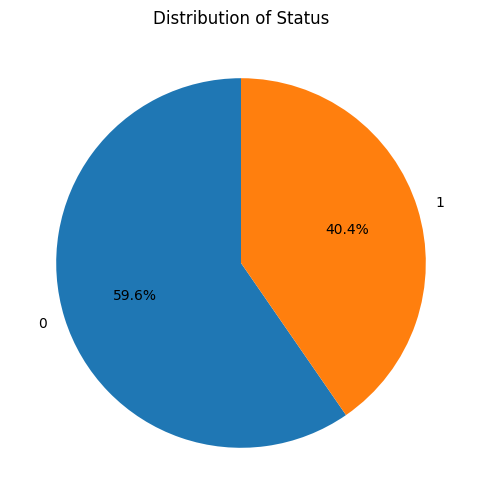

In [ ]:
fig = plt.figure(figsize=(15,5))
#ax = sns.countplot(x='status',data=df,alpha=0.5)
data_channel_data = df.groupby('status').size().reset_index()
data_channel_data.columns = ['status','No of articles']
fig, ax = plt.subplots(figsize=(8, 6))
ax.pie(data_channel_data['No of articles'], labels=data_channel_data['status'], autopct='%1.1f%%', startangle=90)
ax.set_aspect('equal')
plt.title('Distribution of Status')
plt.show()

Skewness: 34.952465
Kurtosis: 1909.931080


<ipython-input-438-2bb66054cb1d>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[' shares'], fit=norm);


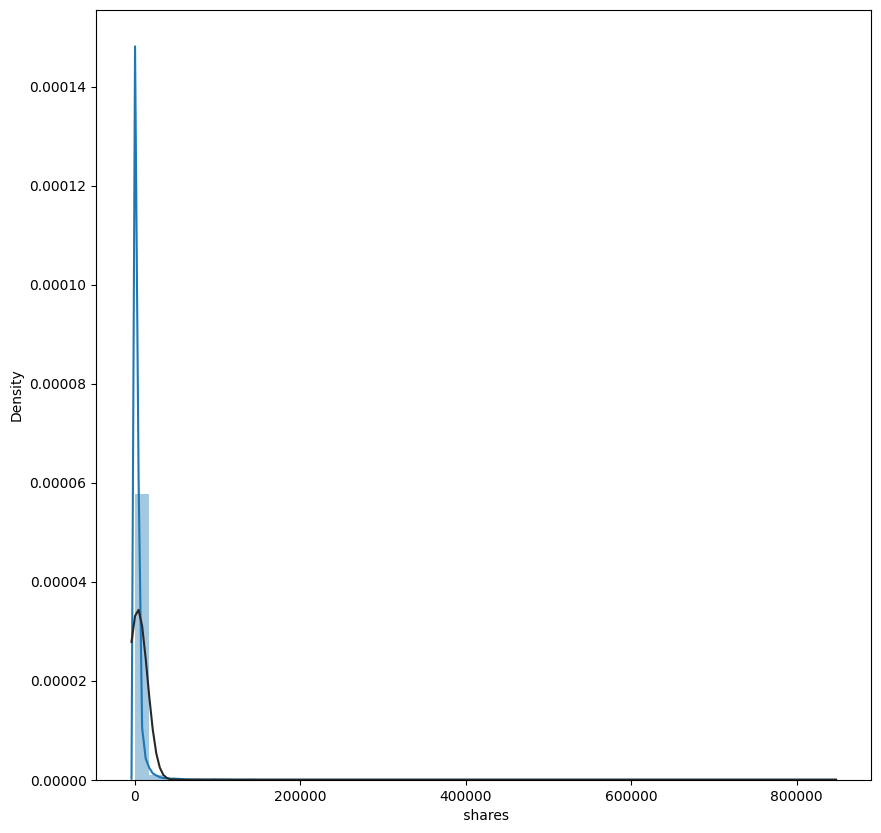

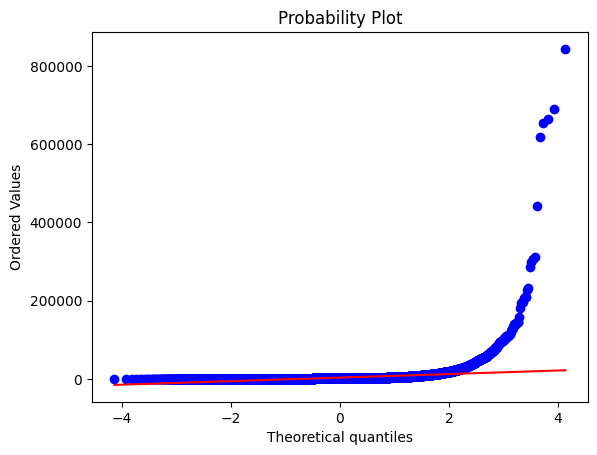

In [ ]:
print("Skewness: %f" % df[' shares'].skew())
print("Kurtosis: %f" % df[' shares'].kurt())

from scipy.stats import norm, probplot

#histogram and normal probability plot
temp_data = df[df[' shares'] <= 100000]
fig,ax = plt.subplots(figsize=(10,10))
sns.distplot(df[' shares'], fit=norm);
fig = plt.figure()
res = probplot(df[' shares'], plot=plt)

In [ ]:
df2=copy(df)


In [ ]:
for col in df2.iloc[:,:-1].columns:
    #applying squareroot transformation
    temp = df2[df2[col] == 0]
    # only apply to non-zero features
    if temp.shape[0] == 0:
        df[col] = df[col]**(1/2)
        print (col)

 n_tokens_title
 n_tokens_content
 n_unique_tokens
 n_non_stop_unique_tokens
 average_token_length
 num_keywords
 LDA_00
 LDA_01
 LDA_02
 LDA_03
 LDA_04
 shares


In [ ]:
df.shape

(38462, 59)

In [ ]:
for col in df.iloc[:,:-1].columns:
    #applying log transformation
    temp = df[df[col] == 0]
    # only apply to non-zero features
    if temp.shape[0] == 0:
        df[col] = np.log(df[col])
        print (col)

 n_tokens_title
 n_tokens_content
 n_unique_tokens
 n_non_stop_unique_tokens
 average_token_length
 num_keywords
 LDA_00
 LDA_01
 LDA_02
 LDA_03
 LDA_04
 shares


<ipython-input-443-73f3f5066832>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(original_data[' n_tokens_content'], fit=norm);


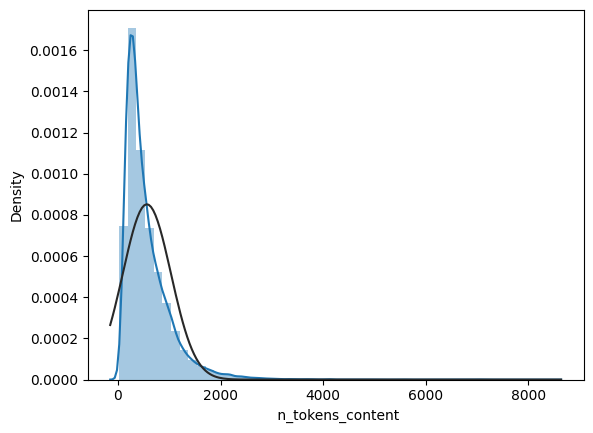

In [ ]:
sns.distplot(original_data[' n_tokens_content'], fit=norm);

<ipython-input-444-06caa628f365>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2[' n_tokens_content'], fit=norm);


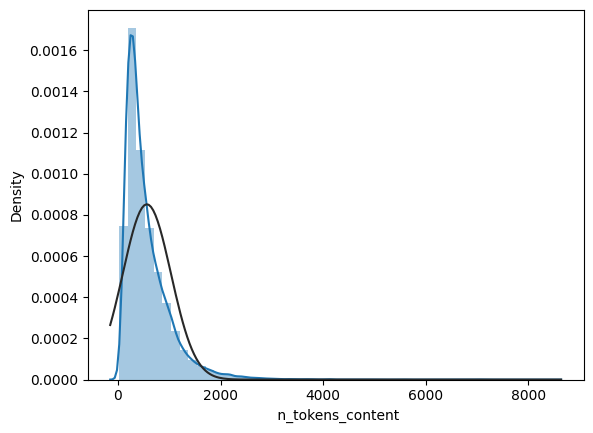

In [ ]:
sns.distplot(df2[' n_tokens_content'], fit=norm);

<ipython-input-445-1e6d2c31e103>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[' n_tokens_content'], fit=norm);


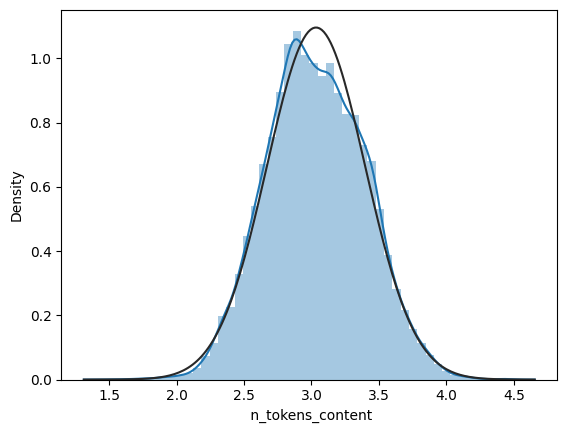

In [ ]:
sns.distplot(df[' n_tokens_content'], fit=norm);

In [ ]:
x=df.iloc[:,:-2].values
y=df.iloc[:,-1].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
classifier.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred=classifier.predict(x_test)
from sklearn import metrics
accu=metrics.accuracy_score(y_test,y_pred)
accu

0.6168885191347754

In [ ]:
from sklearn.metrics import confusion_matrix

# Assuming Y_test and Y_pred are your actual and predicted values
cm1 = confusion_matrix(y_test,y_pred)


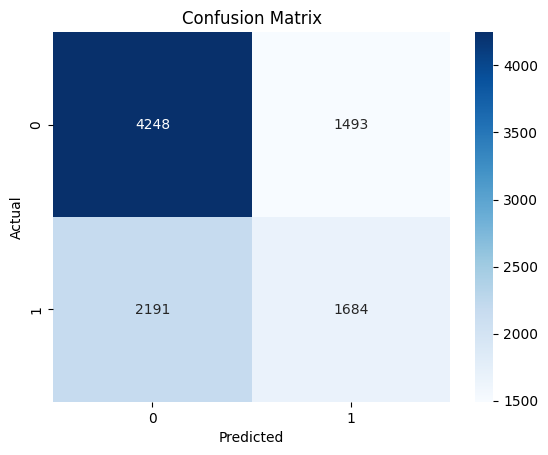

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# classifier1= RandomForestClassifier(n_estimators = 500, criterion = 'entropy', random_state = 0)
# classifier1.fit(x_train, y_train)

In [ ]:
# y_pred1=classifier1.predict(x_test)
# from sklearn import metrics
# accu1=metrics.accuracy_score(y_test,y_pred1)
# print(accu*100)

PCA

In [ ]:
data_weekdays = copy(df.iloc[:, :-1])
data_weekdays

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,1.242453,2.694536,-0.205042,-0.102048,4.0,2.0,1.0,0.0,0.771688,0.804719,...,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,3.192597
1,1.098612,2.770632,-0.251476,-0.116631,3.0,1.0,1.0,0.0,0.796016,0.693147,...,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,3.283336
2,1.098612,2.675929,-0.276580,-0.204838,3.0,1.0,1.0,0.0,0.740048,0.895880,...,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,3.656610
3,1.098612,3.137381,-0.342800,-0.203507,9.0,0.0,1.0,0.0,0.741358,0.972955,...,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,3.545038
4,1.282475,3.488641,-0.438961,-0.307270,19.0,19.0,20.0,0.0,0.771952,0.972955,...,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,3.112279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38457,1.198948,2.923219,-0.318334,-0.189327,9.0,7.0,1.0,1.0,0.754601,1.039721,...,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,3.747771
38458,1.242453,2.896507,-0.180990,-0.061051,9.0,7.0,3.0,48.0,0.741425,0.972955,...,0.136364,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,3.774805
38459,1.151293,3.045655,-0.330480,-0.219929,24.0,1.0,12.0,1.0,0.812353,1.039721,...,0.136364,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,3.774805
38460,0.895880,3.262515,-0.308562,-0.183608,10.0,1.0,1.0,0.0,0.802220,0.804719,...,0.062500,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000,3.501533


In [ ]:
DataChannelMerge=df[[' data_channel_is_lifestyle',' data_channel_is_entertainment' ,' data_channel_is_bus',
                        ' data_channel_is_socmed' ,' data_channel_is_tech',' data_channel_is_world' ]]
#logic to merge data channel
DataChannel_arr=[]
for r in list(range(DataChannelMerge.shape[0])):
    if (((DataChannelMerge.iloc[r,0])==0) and ((DataChannelMerge.iloc[r,1])==0) and ((DataChannelMerge.iloc[r,2])==0) and ((DataChannelMerge.iloc[r,3])==0) and ((DataChannelMerge.iloc[r,4])==0) and ((DataChannelMerge.iloc[r,5])==0)):
        DataChannel_arr.append('Others')
    for c in list(range(DataChannelMerge.shape[1])):
        if ((c==0) and (DataChannelMerge.iloc[r,c])==1):
            DataChannel_arr.append('Lifestyle')
        elif ((c==1) and (DataChannelMerge.iloc[r,c])==1):
            DataChannel_arr.append('Entertainment')
        elif ((c==2) and (DataChannelMerge.iloc[r,c])==1):
            DataChannel_arr.append('Business')
        elif ((c==3) and (DataChannelMerge.iloc[r,c])==1):
            DataChannel_arr.append('Social Media')
        elif ((c==4) and (DataChannelMerge.iloc[r,c])==1):
            DataChannel_arr.append('Tech')
        elif ((c==5) and (DataChannelMerge.iloc[r,c])==1):
            DataChannel_arr.append('World')

In [ ]:
data_weekdays.insert(loc=58, column='channels', value=DataChannel_arr)

# Now I drop the old data
data_weekdays.drop(labels=[' data_channel_is_lifestyle',' data_channel_is_entertainment' ,' data_channel_is_bus',
                        ' data_channel_is_socmed' ,' data_channel_is_tech',' data_channel_is_world'], axis = 1, inplace=True)
print(data_weekdays.shape)
data_weekdays.head(n=4)

(38462, 53)


,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,channels
0,1.242453,2.694536,-0.205042,-0.102048,4.0,2.0,1.0,0.0,0.771688,0.804719,...,0.7,-0.350000,-0.600,-0.200000,0.5,-0.1875,0.0,0.1875,3.192597,Entertainment
1,1.098612,2.770632,-0.251476,-0.116631,3.0,1.0,1.0,0.0,0.796016,0.693147,...,0.7,-0.118750,-0.125,-0.100000,0.0,0.0000,0.5,0.0000,3.283336,Business
2,1.098612,2.675929,-0.276580,-0.204838,3.0,1.0,1.0,0.0,0.740048,0.895880,...,1.0,-0.466667,-0.800,-0.133333,0.0,0.0000,0.5,0.0000,3.656610,Business
3,1.098612,3.137381,-0.342800,-0.203507,9.0,0.0,1.0,0.0,0.741358,0.972955,...,0.8,-0.369697,-0.600,-0.166667,0.0,0.0000,0.5,0.0000,3.545038,Entertainment


In [ ]:
print(data_weekdays.columns)


Index([' n_tokens_title', ' n_tokens_content', ' n_unique_tokens',
       ' n_non_stop_unique_tokens', ' num_hrefs', ' num_self_hrefs',
       ' num_imgs', ' num_videos', ' average_token_length', ' num_keywords',
       ' kw_min_min', ' kw_max_min', ' kw_avg_min', ' kw_min_max',
       ' kw_max_max', ' kw_avg_max', ' kw_min_avg', ' kw_max_avg',
       ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sentiment_polarity', ' global_rate_positive_words',
       ' global_rate_negative_words', ' rate_positive_words',
       ' rate_negative_words', ' avg_positive_polarity',
       ' min_positive_polarity', ' max_positive_polarity',
   

In [ ]:
data_weekdays.shape

(38462, 53)

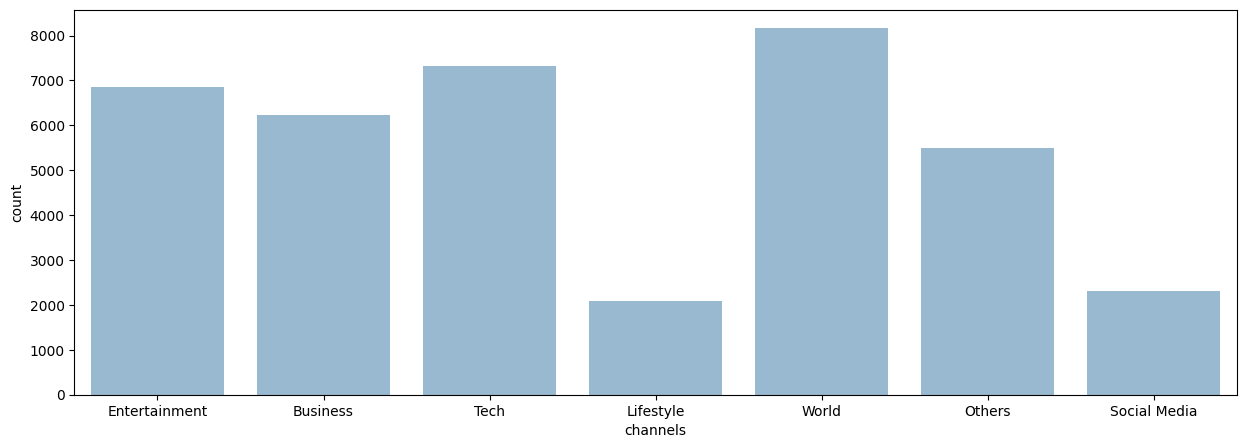

In [ ]:
fig = plt.figure(figsize=(15,5))
ax = sns.countplot(x='channels',data=data_weekdays,alpha=0.5)

In [ ]:
class_counts = data_weekdays.groupby('channels').size().reset_index()
class_counts.columns = ['channels','No of articles']
class_counts

from matplotlib import pyplot as plt
import seaborn as sns
class_counts.groupby('channels').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
class_counts['No of articles'].plot(kind='line', figsize=(8, 4), title='No of articles')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(class_counts['channels'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(class_counts, x='No of articles', y='channels', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

,channels,No of articles
0,Business,6235
1,Entertainment,6855
2,Lifestyle,2077
3,Others,5491
4,Social Media,2311
5,Tech,7325
6,World,8168


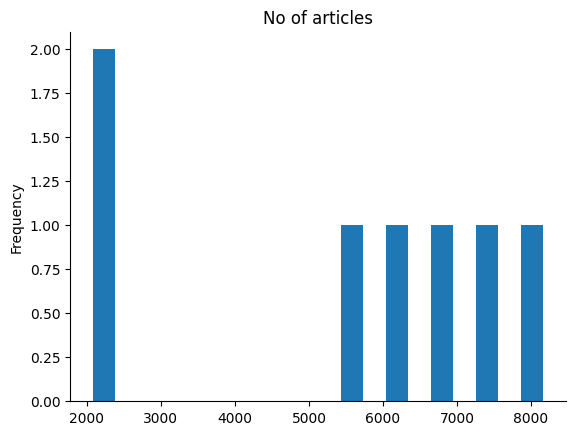

In [ ]:
# @title No of articles

from matplotlib import pyplot as plt
class_counts['No of articles'].plot(kind='hist', bins=20, title='No of articles')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(data_weekdays.loc[:, 'channels'].values)

features_list = ['5 Features', '10 Features', '20 Features', '30 Features']

# the feautures are stored in the seconds column
X_train, X_test, Y_train, Y_test = train_test_split(data_weekdays.iloc[:, :-1], encoded_labels, test_size=0.2, shuffle=False)



# predict the result


In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=500, n_jobs=5, max_depth=50,
                             random_state=0)

clf.fit(X_train, Y_train)

RandomForestClassifier(max_depth=50, n_estimators=500, n_jobs=5, random_state=0)

In [ ]:
from sklearn.metrics import accuracy_score
Y_pred = clf.predict(X_test)
print ("Random Forest - ::Full - ")
print ("Accuracy - " + str(100*accuracy_score(Y_pred, Y_test)) + "%")
# print ("Recall - " + str(recall_score(y_test, y_pred, average='micro')))

Random Forest - ::Full - 
Accuracy - 82.23059924606785%


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
accuracy_score(Y_test, Y_pred)

[[ 925    9    1   13    2   36   26]
 [  29 1337    0  176    2   21   18]
 [  48    9   49   50    4  135   10]
 [   8   63    8  766    0    4    5]
 [  70   42    0   16   36   24   31]
 [  52   20   11    7    1 1030   41]
 [  38   96    0   41    5  195 2183]]


0.8223059924606786

In [ ]:
type(Y_test)


numpy.ndarray

In [ ]:
type(Y_pred)

numpy.ndarray

In [ ]:
# np_array = np.array(encoded_array)


In [ ]:
from sklearn.metrics import confusion_matrix

# Assuming Y_test and Y_pred are your actual and predicted values
cm = confusion_matrix(Y_test, Y_pred)


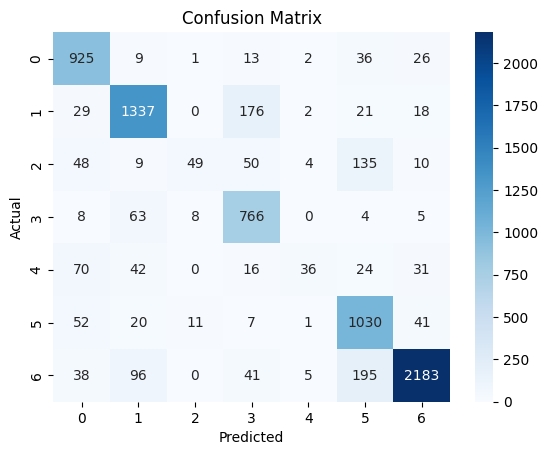

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
input_data=[] #inputs

input_np_data=np.asarray(input_data)

input_data_reshaped=input_np_data.reshape(1,-1)

std_data= sc.transform(input_data_reshaped)
print(std_data)

pridictions=clf.predict(std_data)
print(pridictions)